# Important Libraries


In [2]:
import os
from PIL import Image

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split

import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
import numpy as np

# Importing Data From Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# data_folder = "/content/drive/MyDrive/VAE Data/images"

# Transfrom images (Data Augmentaion)

In [5]:
# transform = transforms.Compose([
#     transforms.RandomResizedCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(degrees=45),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
#     transforms.ToTensor(),
# ])

# to_pil_image = transforms.ToPILImage()

In [6]:
# transform = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.ToTensor(),
# ])

In [7]:
# dataset = ImageFolder(root=data_folder, transform=transform)

In [8]:
# save_path_panda = "/content/drive/MyDrive/VAE Data/Data256/Panda/"
# save_path_rabbit = "/content/drive/MyDrive/VAE Data/Data256/Rabbit/"

# os.makedirs(save_path_panda, exist_ok=True)
# os.makedirs(save_path_rabbit, exist_ok=True)

In [9]:
# for i, (images, label) in enumerate(dataset):
#     class_folder = save_path_panda if label == 0 else save_path_rabbit

#     # Save original image
#     original_image_path = os.path.join(class_folder, f"original_image_{i}.png")
#     save_image(images, original_image_path)

#     # Apply augmentation transformations and save augmented image
#     augmented_image_path = os.path.join(class_folder, f"augmented_image_{i}.png")
#     augmented_image = transform(to_pil_image(images))
#     save_image(augmented_image, augmented_image_path)

# print("Done Augmenting")

# Preparing and Splitting the data

In [10]:
data_folder = "/content/drive/MyDrive/panda_data"
dataset = ImageFolder(root=data_folder, transform=transforms.ToTensor())

In [11]:
class_names = dataset.classes
class_names

['Panda', 'Rabbit']

In [12]:
dataset.class_to_idx

{'Panda': 0, 'Rabbit': 1}

In [13]:
targets = dataset.targets
torch.tensor(targets)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

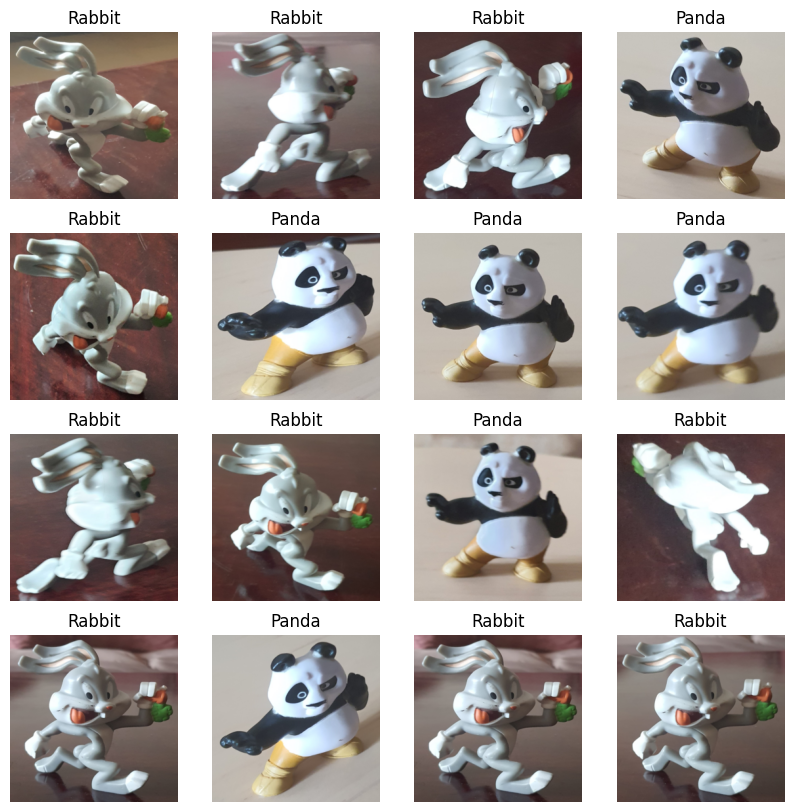

In [14]:
# Visualizing some images
rows = 4
cols = 4

plt.figure(figsize=(10, 10))
for i in range(1, rows * cols + 1):
    rand_idx = torch.randint(1, len(dataset), size=[1]).item()

    image, label = dataset[rand_idx]
    image = image.permute(1, 2, 0)

    plt.subplot(rows, cols, i)
    plt.axis(False)
    plt.title(class_names[label])
    plt.imshow(image)

In [15]:
train_ratio = 0.8
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size

In [16]:
batch_size = 32

In [17]:
# Like sklearn train test split
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create a DataLoader for training set with shuffling
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create a DataLoader for validation set without shuffling
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [18]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 256, 256]), torch.Size([32]))

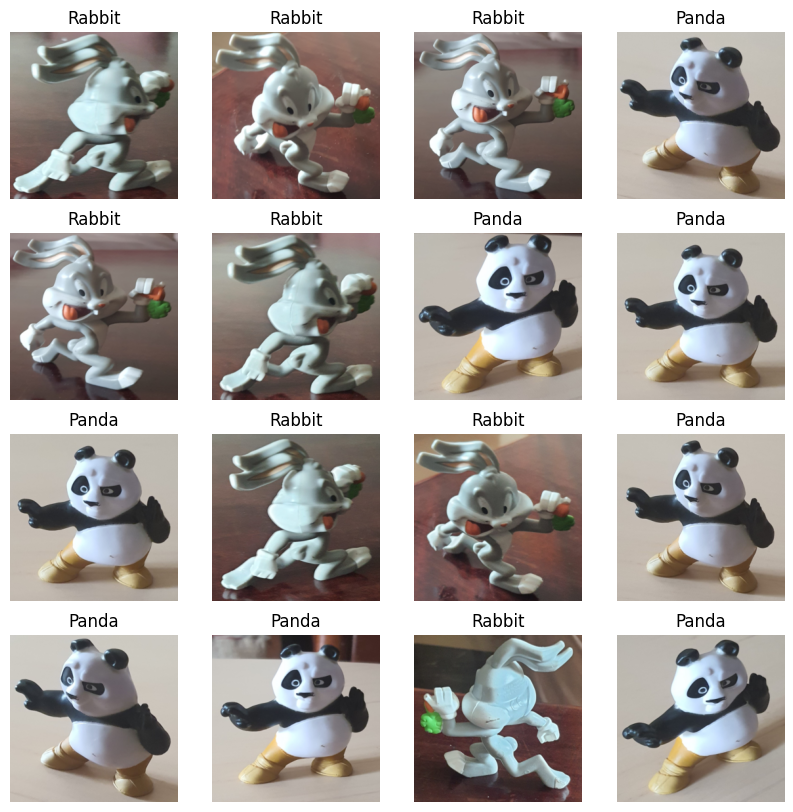

In [19]:
# Visualizing some images from the batch

rows = 4
cols = 4

plt.figure(figsize=(10, 10))
for i in range(1, rows * cols + 1):

    random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
    img, label = train_features_batch[random_idx].squeeze().permute(1, 2, 0), train_labels_batch[random_idx]

    plt.subplot(rows, cols, i)

    plt.title(class_names[label])
    plt.axis(False)
    plt.imshow(img)

# Variation Auto Encoder

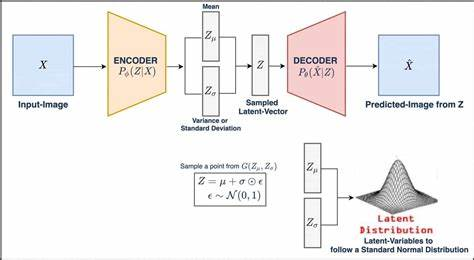

In [20]:


class VAE(nn.Module):
    def __init__(self, latent_size):
        super(VAE, self).__init__()
        # Encoder
        self.flatten = nn.Flatten(start_dim=1)
        self.input_to_hidden_1 = nn.Linear(3*256*256, 256)
        self.hidden_1_to_hidden2 = nn.Linear(256, 128)
        self.hidden_2_to_hidden3 = nn.Linear(128, 64)
        self.hidden_3_to_MU = nn.Linear(64, latent_size)
        self.hidden_3_to_Sigma = nn.Linear(64, latent_size)

        # Decoder
        self.dec1 = nn.Linear(latent_size, 64)
        self.dec2 = nn.Linear(64, 128)
        self.dec3 = nn.Linear(128, 256)
        self.decod4 = nn.Linear(256, 3*256*256)

    def encode(self, x):
        x = F.relu(self.input_to_hidden_1(x))
        x = F.relu(self.hidden_1_to_hidden2(x))
        x = F.relu(self.hidden_2_to_hidden3(x))
        mu, sigma = self.hidden_3_to_MU(x), self.hidden_3_to_Sigma(x)
        return mu, sigma

    def reparameterize(self, mu, sigma):
        eps = torch.randn_like(sigma)
        return mu + eps * sigma

    def decode(self, z):
        z = F.relu(self.dec1(z))
        z = F.relu(self.dec2(z))
        z = F.relu(self.dec3(z))
        return torch.sigmoid(self.decod4(z))

    def forward(self, x):
        x = self.flatten(x)
        mu, sigma = self.encode(x)
        z = self.reparameterize(mu, sigma)
        return self.decode(z), mu, sigma

# Instantiate the CNN-based VAE model
latent_size = 20
vae = VAE(latent_size)


In [21]:
# Instantiate the CNN-based VAE model
latent_size = 10
vae = VAE(latent_size)

In [22]:
def loss_function(recon_x, x, mu, sigma):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + torch.log(pow(sigma,2)) - mu.pow(2) - pow(sigma,2))
    return MSE + KLD

In [23]:
optimizer = torch.optim.Adam(vae.parameters(), lr=0.1)

In [24]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [25]:
vae.to(device)

VAE(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (input_to_hidden_1): Linear(in_features=196608, out_features=256, bias=True)
  (hidden_1_to_hidden2): Linear(in_features=256, out_features=128, bias=True)
  (hidden_2_to_hidden3): Linear(in_features=128, out_features=64, bias=True)
  (hidden_3_to_MU): Linear(in_features=64, out_features=10, bias=True)
  (hidden_3_to_Sigma): Linear(in_features=64, out_features=10, bias=True)
  (dec1): Linear(in_features=10, out_features=64, bias=True)
  (dec2): Linear(in_features=64, out_features=128, bias=True)
  (dec3): Linear(in_features=128, out_features=256, bias=True)
  (decod4): Linear(in_features=256, out_features=196608, bias=True)
)

In [26]:
flatten = nn.Flatten(start_dim=1)


In [27]:

# Assuming you have defined your VAE and DataLoader
vae = VAE(latent_size).to(device)
optimizer = torch.optim.Adam(vae.parameters(), lr=0.001)

epochs = 86

torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(epochs):
    vae.train()

    total_loss = 0.0
    for batch_idx, (data, _) in enumerate(train_dataloader):
        data = data.to(device)

        # Forward Pass
        recon_batch, mu, sigma = vae(flatten(data))

        # Loss
        loss = loss_function(recon_batch, flatten(data), mu, sigma)
        total_loss += loss.item()

        # Optimizer Zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step step step
        optimizer.step()

    average_loss = total_loss / len(train_dataloader.dataset)
    print(f"Epoch {epoch + 1}/{epochs}, Average Loss: {average_loss}")


Epoch 1/86, Average Loss: 11334.869868259804
Epoch 2/86, Average Loss: 9392.964116115196
Epoch 3/86, Average Loss: 8357.792892156862
Epoch 4/86, Average Loss: 7182.369255514706
Epoch 5/86, Average Loss: 6940.996438419118
Epoch 6/86, Average Loss: 6936.02232689951
Epoch 7/86, Average Loss: 6929.627259497549
Epoch 8/86, Average Loss: 6750.121400122549
Epoch 9/86, Average Loss: 6530.591145833333
Epoch 10/86, Average Loss: 6154.572686887255
Epoch 11/86, Average Loss: 5809.9139093137255
Epoch 12/86, Average Loss: 5442.554744944853
Epoch 13/86, Average Loss: 5181.4598077512255
Epoch 14/86, Average Loss: 5125.4692287071075
Epoch 15/86, Average Loss: 5074.215858609069
Epoch 16/86, Average Loss: 4973.5792547487745
Epoch 17/86, Average Loss: 4845.319642310049
Epoch 18/86, Average Loss: 4727.763422947304
Epoch 19/86, Average Loss: 4585.547774969363
Epoch 20/86, Average Loss: 4498.952359068628
Epoch 21/86, Average Loss: 4407.75208716299
Epoch 22/86, Average Loss: 4488.068665747549
Epoch 23/86, Ave

# **Testing and plotting**

In [28]:
recon_batch.shape

torch.Size([24, 196608])

(-0.5, 255.5, 255.5, -0.5)

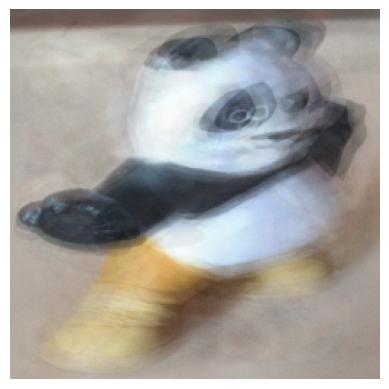

In [29]:
batch_data, _ = next(iter(test_dataloader))
batch_data = batch_data.to(device)
recon_batch, _, _ = vae(flatten(batch_data))
recon_batch=recon_batch.view(-1,3,256,256)
plt.imshow(recon_batch[11].permute(1,2,0).cpu().detach().numpy())
plt.axis(False)

shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch : torch.Size([3, 256, 256])
shape of reconstructed batch : torch.Size([196608])
shape of original_img batch 

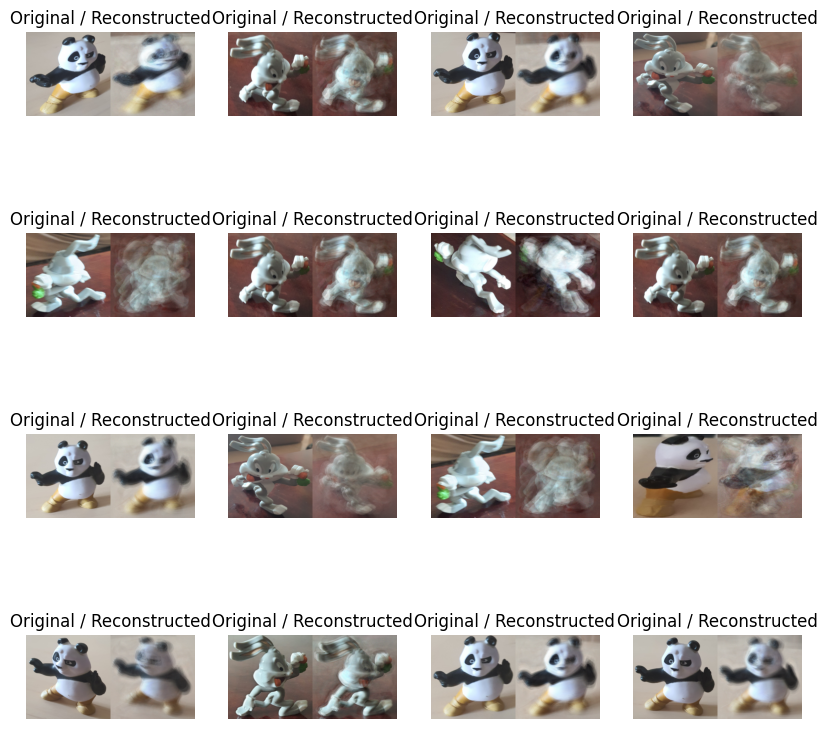

In [30]:
# Visualizing some images from the test dataloader

rows = 4
cols = 4

plt.figure(figsize=(10, 10))
vae.eval()  # Set the model to evaluation mode

with torch.no_grad():  # Ensure no gradient calculations during inference
    for i in range(1, rows * cols + 1):
        # Retrieve a batch from the test dataloader
        batch_data, _ = next(iter(test_dataloader))
        batch_data = batch_data.to(device)

        # Forward pass to get the reconstructed batch
        recon_batch, _, _ = vae(flatten(batch_data))

        # Select a random index within the batch for visualization
        random_idx = torch.randint(0, batch_data.size(0), size=[1]).item()
        original_img = batch_data[random_idx].squeeze()
        print(f'shape of original_img batch : {original_img.shape}')
        reconstructed_img = recon_batch[random_idx].squeeze()
        print(f'shape of reconstructed batch : {reconstructed_img.shape}')

        # Plot the original and reconstructed images
        plt.subplot(rows, cols, i)
        plt.title("Original / Reconstructed")
        plt.axis(False)
        plt.imshow(torch.cat([original_img.permute(1,2,0), reconstructed_img.reshape(3,256,256).permute(1,2,0)], dim=1).cpu())

plt.show()

In [31]:
def plot_latent_space_with_labels(z, labels, num_classes):
    # Create a new figure
    fig = plt.figure(figsize=(10, 10))

    # Add a 3D subplot
    ax = fig.add_subplot(111, projection='3d')

    # Create a scatter plot with a different color for each class
    for i in range(num_classes):
        if z.shape[1] == 2:  # Check if the latent space is two-dimensional
            ax.scatter(z[labels == i, 0], z[labels == i, 1], label=("Panda" if i == 0 else "Rabbit"))
        else:
            ax.scatter(z[labels == i, 0], z[labels == i, 1], z[labels == i, 2], label=("Panda" if i == 0 else "Rabbit"))

    ax.set_xlabel('Latent Dimension 1')
    ax.set_ylabel('Latent Dimension 2')
    ax.set_zlabel('Latent Dimension 3')

    plt.legend()
    plt.show()


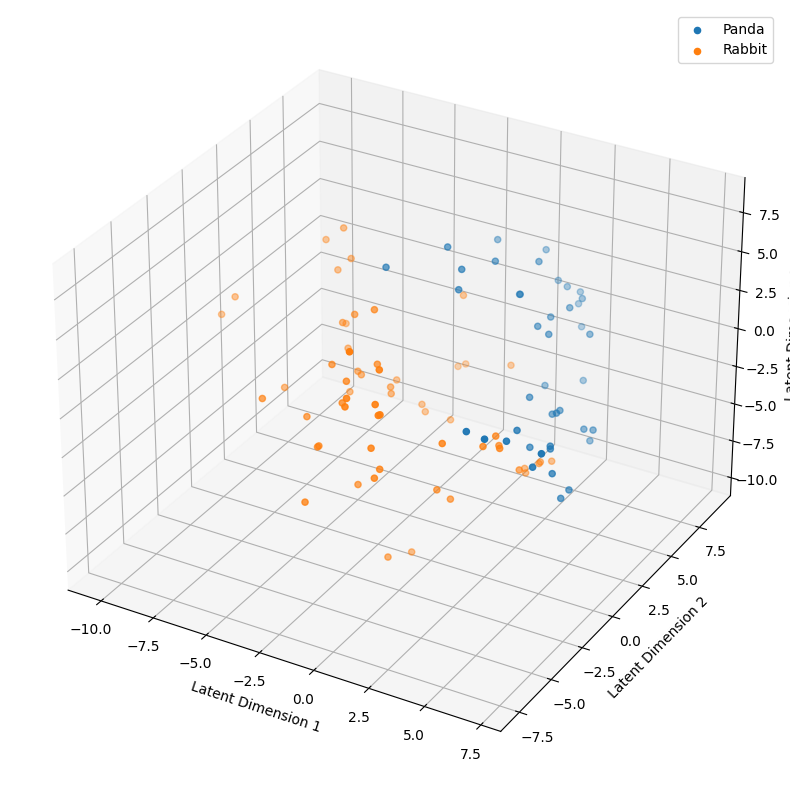

In [32]:
vae.eval()

# Lists to store latent vectors and labels
latent_vectors = []
labels_list = []
reconstructed_images = []

# Iterate through the test dataset (assuming it's a DataLoader)
with torch.no_grad():
    for batch in test_dataloader:
        images, labels = batch  # Assuming your test dataset provides images and labels

        # Transfer to device
        images = images.to(device)

        # Perform inference
        mu, sigma = vae.encode(flatten(images))
        z = vae.reparameterize(mu, sigma)
        reconstructed_images.append(vae.decode(z))

        # Append latent vectors and labels to lists
        latent_vectors.append(z.cpu().numpy())
        labels_list.append(labels.cpu().numpy())

# Concatenate lists to get NumPy arrays
latent_vectors = np.concatenate(latent_vectors, axis=0)
labels_list = np.concatenate(labels_list, axis=0)

# Assuming you have a function 'plot_latent_space_with_labels' that works with NumPy arrays
plot_latent_space_with_labels(latent_vectors, labels_list, 2)

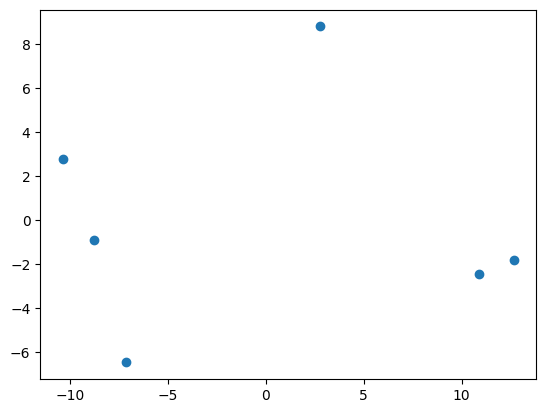

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit the PCA model to your data and apply the dimensionality reduction.
reduced = pca.fit_transform(z.to('cpu'))
plt.scatter(reduced[:,0],reduced[:,1])

# CNN Variation Auto Encoder

In [34]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [35]:
class UnFlatten(nn.Module):
    def forward(self, input, size=1024):
        return input.view(input.size(0), size, 1, 1)

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the VAE architecture
class CNNVAE(nn.Module):
    def __init__(self, image_channels=3, latent_size=20):
        super(CNNVAE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(image_channels, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )

        self.fc_mu = nn.Linear(128 * (256 // 8) * (256 // 8), latent_size)
        self.fc_logvar = nn.Linear(128 * (256 // 8) * (256 // 8), latent_size)

        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 128 * (256 // 8) * (256 // 8)),
            nn.Unflatten(1, (128, 256 // 8, 256 // 8)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, image_channels, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid()
        )

    def encode(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        return x_recon, mu, logvar

# Instantiate the VAE model
vae = VAE(latent_size=20).to(device)

# Define the optimizer
vae_optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Loss function
def loss_fn(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training loop
epochs = 50



In [38]:
image_channels = 3
cnn_vae = CNNVAE(image_channels=image_channels).to(device)
cnn_optimizer = torch.optim.Adam(cnn_vae.parameters(), lr=1e-3)
epochs__ = 50

def loss_fn(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')                   #                  reduction  ='sum ' calculate cross entropy for each feature and sum it for each sample
    KLD = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD, BCE, KLD

for epoch in range(epochs__):
    cnn_vae.train()

    for idx, (images, _) in enumerate(train_dataloader):
        images = images.to(device)
        cnn_recon_images, cnn_mu, cnn_logvar = cnn_vae(images)
        cnn_loss, cnn_bce, cnn_kld = loss_fn(cnn_recon_images, images, cnn_mu, cnn_logvar)
        cnn_optimizer.zero_grad()
        cnn_loss.backward()
        cnn_optimizer.step()

    print(f"Epoch[{epoch+1}/{epochs__}] Loss: {cnn_loss.item()} {cnn_bce.item()} {cnn_kld.item()}")


Epoch[1/50] Loss: 3262436.25 3262434.0 2.3726303577423096
Epoch[2/50] Loss: 3176987.25 3176982.25 5.085305213928223
Epoch[3/50] Loss: 3038358.75 3038351.0 7.773847579956055
Epoch[4/50] Loss: 3011815.25 3011810.0 5.3344244956970215
Epoch[5/50] Loss: 2962147.75 2962142.0 5.694508075714111
Epoch[6/50] Loss: 2969708.0 2969701.75 6.336993217468262
Epoch[7/50] Loss: 2893784.25 2893776.75 7.511211395263672
Epoch[8/50] Loss: 2932556.5 2932550.0 6.477483749389648
Epoch[9/50] Loss: 2895101.25 2895094.25 7.047924041748047
Epoch[10/50] Loss: 2870930.75 2870923.75 7.0759687423706055
Epoch[11/50] Loss: 2870201.25 2870194.25 6.908905982971191
Epoch[12/50] Loss: 2870921.75 2870914.0 7.683647155761719
Epoch[13/50] Loss: 2921471.0 2921463.0 7.919191837310791
Epoch[14/50] Loss: 2768949.75 2768939.25 10.604981422424316
Epoch[15/50] Loss: 2795005.0 2794994.5 10.460212707519531
Epoch[16/50] Loss: 2849989.5 2849979.25 10.142613410949707
Epoch[17/50] Loss: 2773910.75 2773899.5 11.17395305633545
Epoch[18/50] L

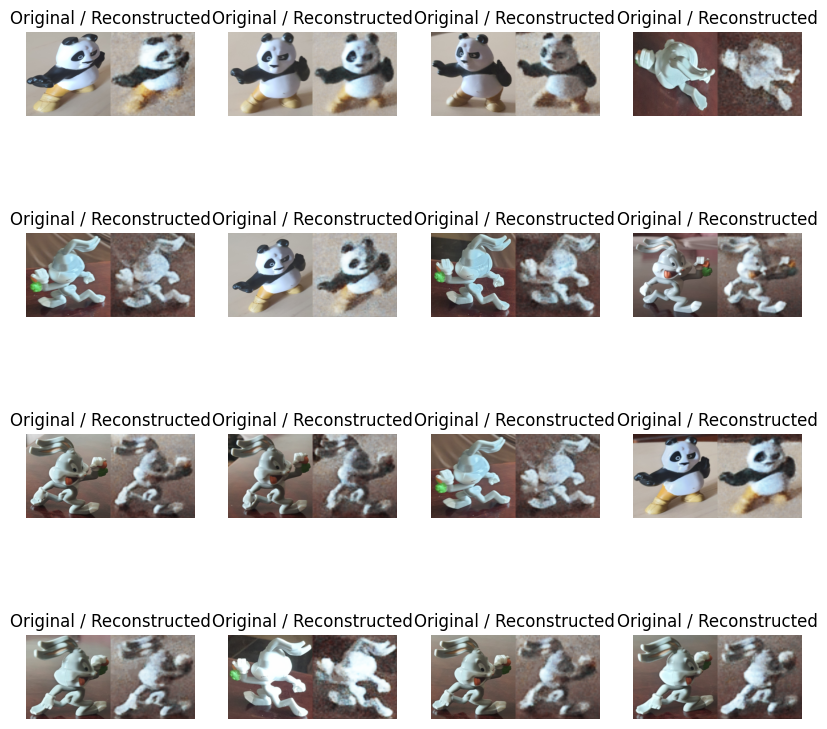

In [39]:
rows = 4
cols = 4

plt.figure(figsize=(10, 10))
cnn_vae.eval()  # Set the model to evaluation mode

with torch.no_grad():  # Ensure no gradient calculations during inference
    for i in range(1, rows * cols + 1):
        # Retrieve a batch from the test dataloader
        batch_data, _ = next(iter(test_dataloader))
        batch_data = batch_data.to(device)

        # Forward pass to get the reconstructed batch
        recon_batch, _, _ = cnn_vae(batch_data)

        # Select a random index within the batch for visualization
        random_idx = torch.randint(0, batch_data.size(0), size=[1]).item()
        original_img = batch_data[random_idx].squeeze().permute(1, 2, 0)
        reconstructed_img = recon_batch[random_idx].squeeze().permute(1, 2, 0)

        # Plot the original and reconstructed images
        plt.subplot(rows, cols, i)
        plt.title("Original / Reconstructed")
        plt.axis(False)
        plt.imshow(torch.cat([original_img, reconstructed_img], dim=1).cpu())

plt.show()

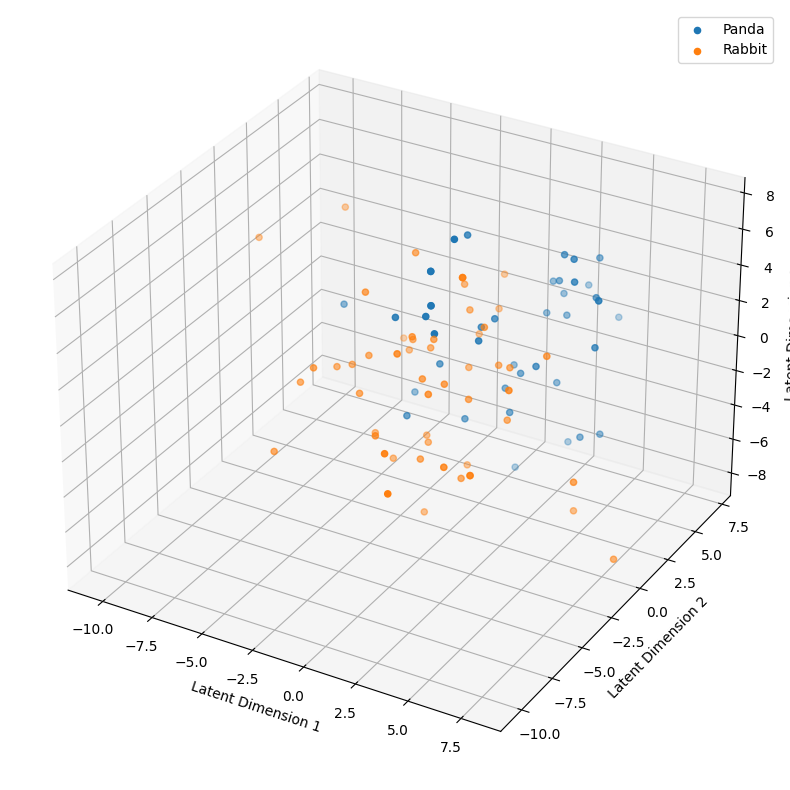

In [40]:
# Lists to store latent vectors and labels
latent_vectors = []
labels_list = []
reconstructed_images = []

# Iterate through the test dataset (assuming it's a DataLoader)
with torch.no_grad():
    for batch in test_dataloader:
        images, labels = batch  # Assuming your test dataset provides images and labels

        # Transfer to device
        images = images.to(device)

        # Perform inference
        mu, sigma = cnn_vae.encode(images)
        z=cnn_vae.reparameterize(mu,sigma)
        reconstructed_images.append(cnn_vae.decode(z))

        # Append latent vectors and labels to lists
        latent_vectors.append(z.cpu().numpy())
        labels_list.append(labels.cpu().numpy())

# Concatenate lists to get NumPy arrays
latent_vectors = np.concatenate(latent_vectors, axis=0)
labels_list = np.concatenate(labels_list, axis=0)

# Assuming you have a function 'plot_latent_space_with_labels' that works with NumPy arrays
plot_latent_space_with_labels(latent_vectors, labels_list, 2)

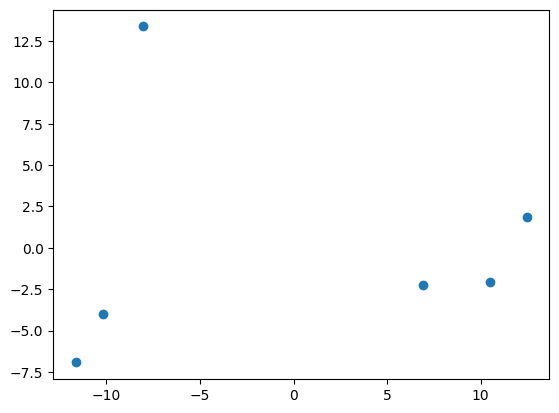

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit the PCA model to your data and apply the dimensionality reduction.
reduced = pca.fit_transform(z.to('cpu'))
plt.scatter(reduced[:,0],reduced[:,1])
